In [3]:
import csv
girths = []
heights = []
volumes = []
datafile = "trees.txt"
with open(datafile, 'rU') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    
    # skip the first line
    
    for row in reader:
        girths.append(eval(row['Girth']))
        heights.append(eval(row['Height']))
        volumes.append(eval(row['Volume']))

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
np_data = np.array([girths,heights,volumes])

In [7]:
np_data = np_data.transpose()

In [8]:
np_data.shape

(31L, 3L)

In [28]:
from sklearn.cluster import KMeans


In [29]:
x= np_data
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

dimensionality reduction  - kind of compression, keeps what is relevant in form of a new dimension(s) and removes rest.

PCA - principal component analysis. Decomposition algorithms


In [10]:
from sklearn.decomposition import PCA

In [13]:
from sklearn import datasets
digits = datasets.load_digits()


In [15]:
data = digits.data
data.shape

(1797L, 64L)

In [42]:
pca = PCA(n_components=2).fit_transform(data)

In [19]:
pca.shape

(1797L, 2L)

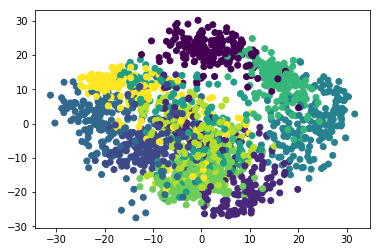

In [43]:
plt.scatter(pca[:,0],pca[:,1], c=digits.target)

In [49]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

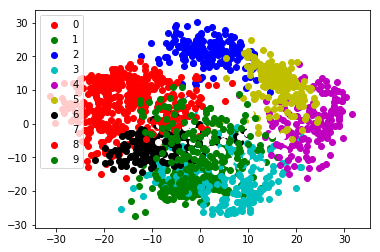

In [50]:
plot_2D(pca,kmeans.labels_,[0,1,2,3,4,5,6,7,8,9])

Text analysis - one hot, count vectorization, tf-idf
make a dictionary of all the words in the language and then vectorize by marking 1 when the word occurs.
or write the count, or use count * 1/total occurence in document.
use PCA to reduce dimension.

